In [32]:
# load dependencies
import h5py
import tensortools as tt # toolbox for TCA
import os
import numpy as np
import importlib as imp
import matplotlib.pyplot as plt

import utils
import load_preprocess_data

In [20]:
# indicate a file to analyze
fname = 'VJ_OFCVTA_7_260_D6'
fdir = 'C:\\2pData\\Vijay data\\VJ_OFCVTA_7_D8_trained\\'
sima_h5_path = os.path.join(fdir, fname + '_sima_mc.h5')

# set the sampling rate
fs = 5

In [23]:
# trial windowing 
trial_start_end_seconds = np.array([-1, 3]) # trial windowing in seconds relative to ttl-onset/trial-onset
conditions = ['minus', 'plus_rewarded']

# if helper scripts have been updated, can refresh them with this line
imp.reload(utils)
imp.reload(load_preprocess_data);

In [24]:
## extract trial data into xarray

num_avg_groups = 5.0 
""" number of segments to split trials over. Ie. Because single trial plots in state space is noisy, 
    let's break the trials up into groups and average to get less noisier signal.
""" 

data_dict = load_preprocess_data.load(fname, fdir, fs, trial_start_end_seconds, conditions, num_avg_groups)

In [30]:
# Make synthetic dataset.
condition = 'plus_rewarded'
I = len(data_dict[condition]['xarr_flatten_xy'].yx)
R = 3 # dimensions/rank
# R is number of components

X = data_dict[condition]['xarr_flatten_xy'].data
#dims are (trial, yx_pix, time)

0.7953696388884365


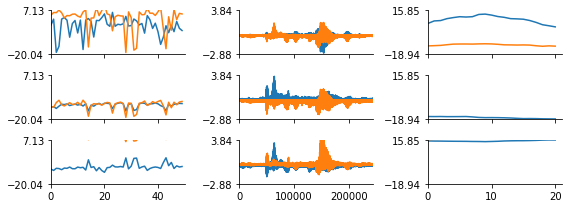

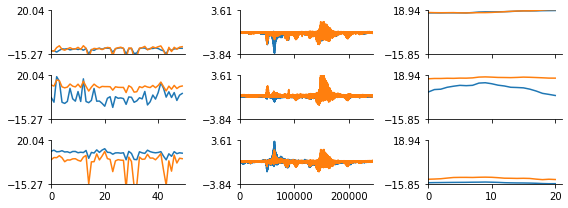

In [54]:
# Fit CP tensor decomposition (two times).

U = tt.cp_als(X, rank=R, verbose=False) # CP decomposition by classic alternating least squares (ALS).
# The `rank` sets the number of components to be computed.
# output are factor matrices of the fitted results
# objective function is the frbenius norm
V = tt.cp_als(X, rank=R, verbose=False)

# Compare the low-dimensional factors from the two fits.
fig, _, _ = tt.plot_factors(U.factors)
tt.plot_factors(V.factors, fig=fig)

# Align the two fits and print a similarity score.
sim = tt.kruskal_align(U.factors, V.factors, permute_U=True, permute_V=True)
print(sim)

# Plot the results again to see alignment.
fig, ax, po = tt.plot_factors(U.factors)
tt.plot_factors(V.factors, fig=fig)

# Show plots.
plt.show()

In [48]:
# function to make a figure with subplots of heatmaps
def plot_img_vectorized_component(n_columns, data, original_dims):
    
    clims = [np.min(data), np.max(data)]
    
    num_comps = data.shape[0]
    n_rows = int(np.ceil(num_comps/n_columns))
   
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize = (15, n_rows*4))
    for iComp in range(num_comps):
        
        if n_rows == 1:
            subplot_index = iComp
        else:
            subplot_index = np.unravel_index(iComp, (n_rows, n_columns)) # turn int index to a tuple of array coordinates
        
        title = f"PC {iComp}"
        pc_pixel_weights = data[iComp,:].reshape(original_dims)

        im = utils.subplot_heatmap(ax[subplot_index], title, pc_pixel_weights, clims = clims)
     
    fig.colorbar(im, ax = ax, shrink = 0.5)

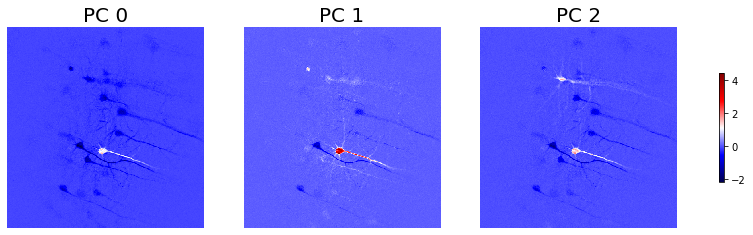

In [55]:
pixel_factor = 1
time_factor = 2

n_columns = 3

original_dims = data_dict[condition]['data'].shape[1:3] # data dim in format of trial,y,x,sample

plot_img_vectorized_component(n_columns, np.transpose(V.factors[pixel_factor]), original_dims)

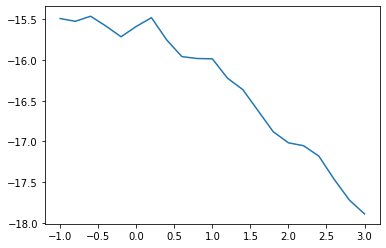

In [53]:
component = 0

tseries = V.factors[time_factor][:,component]
plt.figure()
plt.plot(data_dict['trial_tvec'], tseries)

Rank-1 models:  min obj, 0.66;  max obj, 0.66;  time to fit, 64.2s


Rank-2 models:  min obj, 0.66;  max obj, 0.66;  time to fit, 143.3s


Rank-3 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 152.3s


Rank-4 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 177.2s


Rank-5 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 191.9s


Rank-6 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 160.3s


Rank-7 models:  min obj, 0.64;  max obj, 0.64;  time to fit, 177.4s


Rank-8 models:  min obj, 0.64;  max obj, 0.64;  time to fit, 187.5s


Rank-1 models:  min obj, 0.66;  max obj, 0.66;  time to fit, 58.0s


Rank-2 models:  min obj, 0.66;  max obj, 0.66;  time to fit, 390.6s


Rank-3 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 578.7s


Rank-4 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 656.3s


Rank-5 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 710.4s


Rank-6 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 738.8s


Rank-7 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 744.3s


Rank-8 models:  min obj, 0.64;  max obj, 0.65;  time to fit, 854.5s


Fitting rank-1 models:   0%|                                                                     | 0/3 [00:00<?, ?it/s]c:\users\stuberadmin\anaconda3\envs\escience_incubator\lib\site-packages\tensortools\optimize\ncp_hals.py:182: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  Cp = factors[:, idx] @ grams[idx][:, p]
c:\users\stuberadmin\anaconda3\envs\escience_incubator\lib\site-packages\numba\typing\npydecl.py:958: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))
                                                                                                                       

Rank-1 models:  min obj, 0.66;  max obj, 0.66;  time to fit, 40.0s


Rank-2 models:  min obj, 0.66;  max obj, 0.66;  time to fit, 67.8s


Rank-3 models:  min obj, 0.65;  max obj, 0.66;  time to fit, 187.2s


Rank-4 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 187.0s


Rank-5 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 205.4s


Rank-6 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 212.2s


Rank-7 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 200.2s


Rank-8 models:  min obj, 0.64;  max obj, 0.64;  time to fit, 238.2s


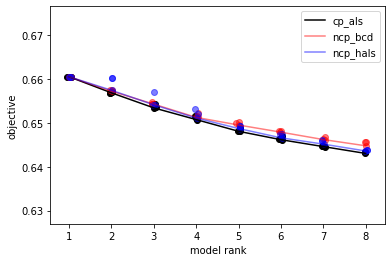

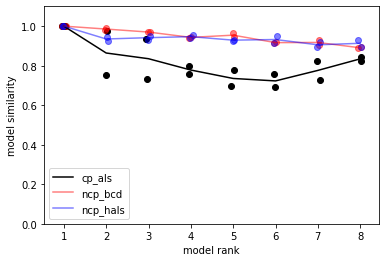

In [56]:
# Make dataset.

# Fit ensembles of tensor decompositions.

methods = (

  'cp_als',    # fits unconstrained tensor decomposition.

  'ncp_bcd',   # fits nonnegative tensor decomposition.

  'ncp_hals',  # fits nonnegative tensor decomposition.

)

ensembles = {}

for m in methods:

    ensembles[m] = tt.Ensemble(fit_method=m, fit_options=dict(tol=1e-4))

    ensembles[m].fit(X, ranks=range(1, 9), replicates=3)

# Plotting options for the unconstrained and nonnegative models.

plot_options = {

  'cp_als': {

    'line_kw': {

      'color': 'black',

      'label': 'cp_als',

    },

    'scatter_kw': {

      'color': 'black',

    },

  },

  'ncp_hals': {

    'line_kw': {

      'color': 'blue',

      'alpha': 0.5,

      'label': 'ncp_hals',

    },

    'scatter_kw': {

      'color': 'blue',

      'alpha': 0.5,

    },

  },

  'ncp_bcd': {

    'line_kw': {

      'color': 'red',

      'alpha': 0.5,

      'label': 'ncp_bcd',

    },

    'scatter_kw': {

      'color': 'red',

      'alpha': 0.5,

    },

  },

}



# Plot similarity and error plots.

plt.figure()

for m in methods:

    tt.plot_objective(ensembles[m], **plot_options[m])

plt.legend()



plt.figure()

for m in methods:

    tt.plot_similarity(ensembles[m], **plot_options[m])

plt.legend()



plt.show()

In [57]:
V.factors[time_factor][:,component]

(50, 244510, 21)

In [ ]:

# container to store data relevant to the 3d plot
s_space_dict = {}
s_space_dict['line_cmaps'] = ['autumn','winter']

# determine alpha for each trial (encoding time block)
trial_group_alphas = np.linspace(0.3, 1, num_avg_groups)

# loop through conditions
for idx_condition, condition in enumerate(conditions):

    # set up variables for this condition
    s_space_dict[condition] = {} # sub-dict for condition-specific data 
    n = data_dict[condition]['num_samples'] # number of data points
    cmap_lc = s_space_dict['line_cmaps'][idx_condition] # grab this condition's line cmap
    
    #set x,y,z, time data
    x = data_dict[condition]['Xt'][:,0]
    y = data_dict[condition]['Xt'][:,1]
    z = data_dict[condition]['Xt'][:,2]
    svec = np.arange(0,n) # sample vector; important for encoding color as time
    # USER DEFINE: which dimension to encode color; can be x, y, z, svec
    color_encode = svec 
    
    # update x,y,z limits based on this condition's data
    if idx_condition == 0:
        xlim = [np.min(x), np.max(x)]; ylim = [np.min(y), np.max(y)]; zlim = [np.min(z), np.max(z)]
    else:
        xlim = update_lims([np.min(x), np.max(x)], xlim); 
        ylim = update_lims([np.min(y), np.max(y)], ylim); 
        zlim = update_lims([np.min(z), np.max(z)], zlim);
    
    ### Create line segment objects for ALL TRIAL-AVGED DATA ###
    s_space_dict[condition]['line_collect'] = make_line_collection(x, y, z, color_encode, cmap_lc)
    
    ### Create line segment objects for TRIAL-BLOCKED/GROUPED DATA ###
    s_space_dict[condition]['line_collect_trial'] = {}
    for idx, trial in enumerate(data_dict[condition]['Xt_trial']):
        
        # make the line segment object for this trial group
        s_space_dict[condition]['line_collect_trial'][idx] = make_line_collection(trial[:,0], trial[:,1], trial[:,2], 
                                                                                  color_encode, 
                                                                                  cmap_lc, 
                                                                                  trial = True, 
                                                                                  alpha = trial_group_alphas[idx])

        # update x,y,z limits based on this "trial's" data
        xlim = update_lims([np.min(trial[:,0]), np.max(trial[:,0])], xlim); 
        ylim = update_lims([np.min(trial[:,1]), np.max(trial[:,1])], ylim);
        zlim = update_lims([np.min(trial[:,2]), np.max(trial[:,2])], zlim);
        
# create plot and set attributes
fig = plt.figure(figsize = (9,7))
ax = fig.gca(projection='3d')
ax.set_xlim(xlim); ax.set_ylim(ylim); ax.set_zlim(zlim)
plt.title('PCA State Space')
ax.set_xlabel('PC0', fontsize = 20); ax.set_ylabel('PC1', fontsize = 20); ax.set_zlabel('PC2', fontsize = 20);

# plot the line segments
for condition in conditions:
    
    # for all trial-avged data
    ax.add_collection3d(s_space_dict[condition]['line_collect'], zs=z, zdir='z')

    # for trial group data
    for trial_lc in s_space_dict[condition]['line_collect_trial'].values():
        
        ax.add_collection3d(trial_lc, zs=z, zdir='z')
        
ax.legend(['All Trial Avg','Trial 1-10 Avg','Trial 11-20 Avg',
           'Trial 21-30 Avg','Trial 31-40 Avg','Trial 41-50 Avg']);